## Population pyramid

!!! This function renders only package's internal data, it might not be the most up-to-date
Have a look at api.insee.fr !!!
!!! This function is still at an early development stage,
future changes are likely !!!
Getting data: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]
C:\Users\eurhope\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


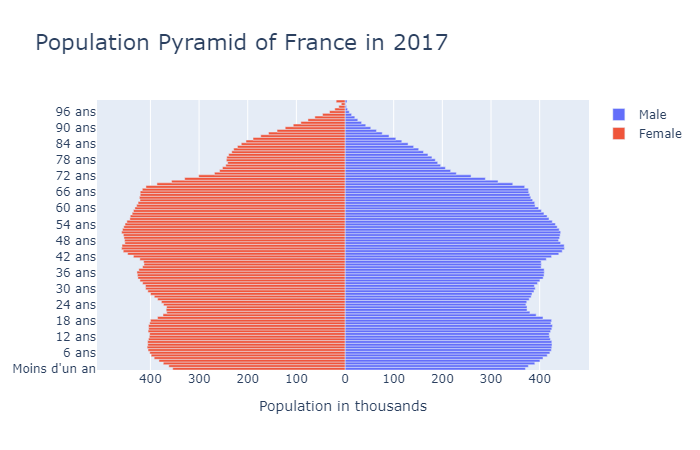

In [1]:
import os
os.environ['insee_key'] = "my_key"
os.environ['insee_secret'] = "my_secret_key"

from pynsee.local import *

import pandas as pd
import plotly.graph_objects as gp

metadata = get_local_metadata()

data = get_insee_local(dataset_version='GEO2020RP2017',
                       variables = 'SEXE-AGED100',
                       nivgeo = 'FE',
                       geocodes=['1'])

dataM = data[(data.SEXE == '1') & (data.AGED100 != 'ENS')]
dataF = data[(data.SEXE == '2') & (data.AGED100 != 'ENS')]
dataF.loc[:, 'OBS_VALUE'] = dataF['OBS_VALUE'] * -1

#figure
fig = gp.Figure()
  
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= dataM.AGED100_label, x = dataM.OBS_VALUE, 
                     name = 'Male', 
                     orientation = 'h'))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = dataM.AGED100_label, x = dataF.OBS_VALUE,
                     name = 'Female', orientation = 'h'))

# Updating the layout for our graph
fig.update_layout(title = 'Population Pyramid of France in 2017',
                 title_font_size = 22, barmode = 'relative',
                 bargap = 0.0, bargroupgap = 0,
                   xaxis = dict(tickvals = [-400000, -300000, -200000, -100000, 
                                          0, 100000, 200000, 300000, 400000],
                                
                              ticktext = ['400', '300', '200', '100', '0',
                                          '100', '200', '300', '400'],
                                
                              title = 'Population in thousands',
                              title_font_size = 14))

#fig.write_html("ex_population_pyramid.html")
fig.show('png')